In [39]:
from pathlib import Path
import numpy as np
import os
from matplotlib import pyplot as plt
import matplotlib as mpl

%matplotlib inline
np.seterr(all='warn')
textwidth = 6.268
mpl.rcParams['figure.dpi'] = 70
default_figargs = dict(figsize = (textwidth,textwidth))

import logging
mpl_logger = logging.getLogger('matplotlib')
mpl_logger.setLevel(logging.WARNING) 

In [40]:
datapath = Path('data')
datapath = Path('completed_runs')
runs = sorted((f.stat().st_mtime,f) for f in datapath.iterdir() if not f.name.startswith('.'))
runs

[(1563607068.773008,
  PosixPath('completed_runs/256_J=5_U=5_20000_samples_thinning=10')),
 (1563966104.1757228,
  PosixPath('completed_runs/256_J=5_U=5_20000_samples_thinning=10_run=2'))]

In [41]:
this_run = runs[-1][1]
print(f'looking in {this_run}')
parameters = np.load(this_run/'parameters.npz', allow_pickle = True)
datafiles = sorted([(int(f.stem), f) for f in this_run.iterdir() if f.name.endswith('npz') and not f.name == 'parameters.npz'])
jobs = np.array([j_id for j_id, f in datafiles])
print(f'job ids range from {min(jobs)} to {max(jobs)}')
print(f'missing jobs: {set(range(max(jobs))) - set(jobs)}')

looking in completed_runs/256_J=5_U=5_20000_samples_thinning=10_run=2
job ids range from 0 to 49
missing jobs: set()


In [42]:
data = [np.load(file, allow_pickle = True)['log'][()] for n,file in datafiles]

In [43]:
#_, file = datafiles[5]
#parameters = np.load(file, allow_pickle = True)#['parameters'][()]
list(parameters.keys())

['Ts', 'parameters', 'MCMC_params']

In [44]:
parameters['parameters'][()]

{'N_sites': 256,
 't': 1,
 'alpha': 1.5,
 'mu': 0,
 'beta': 20.0,
 'J': 5,
 'U': 5,
 'normalise': True}

In [45]:
parameters['MCMC_params'][()]

{'N_steps': 20000,
 'N_burn_in': 1000,
 'thin': 10,
 'logger': <FKMC.montecarlo.Eigenspectrum_IPR_all at 0x7f6f64214278>,
 'proposal': <function FKMC.montecarlo.p_multi_site_uniform_reflect(j, N_sites, **kwargs)>,
 'accept_function': <function FKMC.montecarlo.perturbation_accept(state, sites, logger, current_Ff, current_Fc, parameters)>,
 'warnings': True}

In [46]:
log = data[5]
print([key for key in dir(log) if not key.startswith('_')])

['A', 'Fc', 'Ff', 'IPRs', 'Mf_moments', 'N_cumulants', 'N_sites', 'N_steps', 'Nc', 'Nf', 'accept_rates', 'classical_accept_rates', 'eigenval_bins', 'eigenvals', 'last_state', 'powers', 'proposal_rates', 'return_vals', 'start', 'state', 'time', 'update']


In [48]:
f'{sum([log.time for log in data]) / (60*60):.0f} hours total'

'219 hours total'

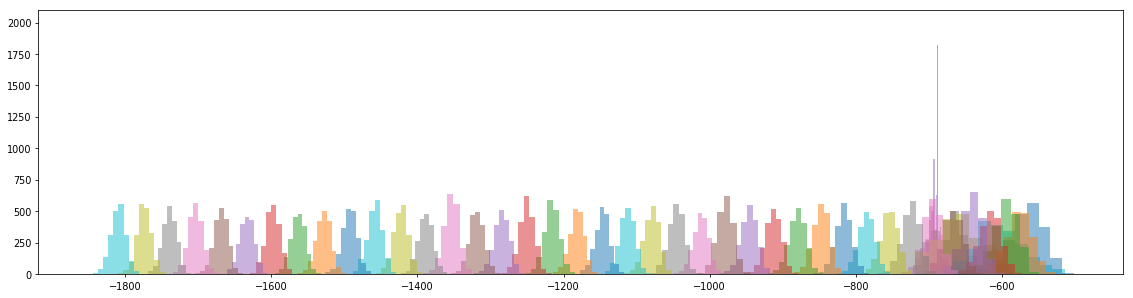

In [50]:
Ts = parameters['Ts']
assert(len(data) == len(Ts))

f, ax = plt.subplots(1, figsize = (20,5))
for T, d in zip(Ts,data):
    F = d.Ff + d.Fc
    #print(f'T = {T}, F.mean() = {F.mean()}')
    ax.hist(F, label = T, alpha = 0.5)
#ax.legend()

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


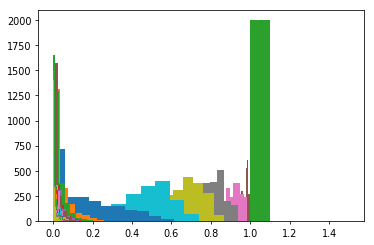

In [12]:
f, ax = plt.subplots(1)
for T, d in zip(Ts,data):
    ax.hist(d.Mf_moments[2], label = T)
#ax.legend()

<ErrorbarContainer object of 3 artists>

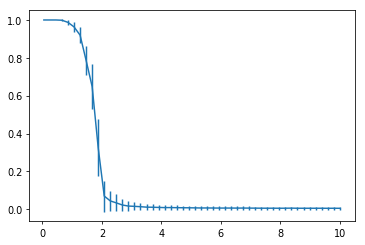

In [51]:
y = np.array([log.Mf_moments[2].mean() for log in data])
yerr = np.array([log.Mf_moments[2].std() for log in data]) 
x = Ts

f, ax = plt.subplots(1)
ax.errorbar(x, y, yerr = yerr)


/home/tch14/conda-envs/intelpython3.5/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/home/tch14/conda-envs/intelpython3.5/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/home/tch14/conda-envs/intelpython3.5/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


[ -8.90167349  95.62077081 169.73305349]
[ -7.48223435  67.52469213 122.32119091]
[-9.10576986 45.8369339  86.41186527]
[-2.98011195 37.826944   68.10872121]
[-2.44846116 28.33598951 52.66212404]
[-1.89456072 23.19513613 43.64513956]
[-1.6587242  19.92623454 37.82439764]
[-1.55513048 17.40570303 33.34362784]
[-1.46792255 15.4548703  29.85329886]
[-1.40120813 13.89611494 27.05412882]
[-1.34089062 12.61884161 24.7494008 ]
[-1.29217866 11.54448536 22.80225219]
[-1.2625748  10.63141464 21.14111835]
[-1.23871041  9.84522586 19.70759477]
[-1.21191855  9.16759434 18.46634386]
[-1.19424963  8.56558197 17.35978664]
[-1.18073927  8.03348908 16.3788162 ]
[-1.16935887  7.56045275 15.5043659 ]
[-1.15814269  7.13617016 14.71765379]
[-1.14915688  6.75167465 14.00282607]
[-1.14270494  6.40224441 13.35146338]
[-1.13635307  6.08401525 12.75689216]
[-1.13071405  5.79227155 12.21058679]
[-1.12651067  5.52327832 11.70567979]
[-1.12319582  5.27681821 11.24222316]
[-1.11950626  5.04896373 10.8129784 ]
[-1.11

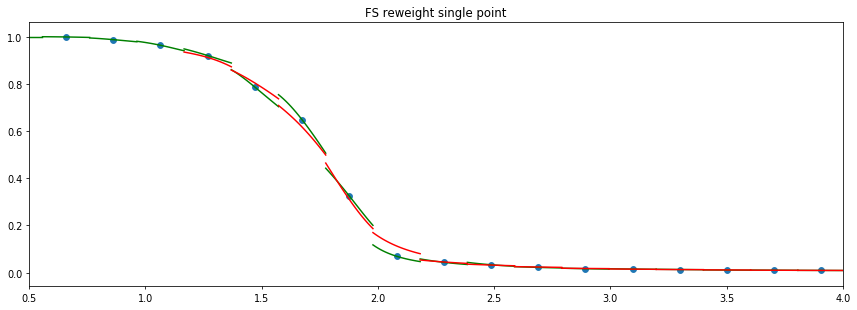

In [336]:
def new_fs(new_betas, Fs, betas, fs):
    #new_beta: the betas we want to interpolate to
    #betas: the set of temperatures at which the mcmc runs were performed
    #Fs.shape = (number of runs, number of step)
    #fs.shape = (number of runs), this need to be determined self consistently
    #final shapes: [new_beta index, runs over mcmc runs, runs over steps in an mcmc run, runs over runs again for innnermost sum]
    betas = betas[None, None, None, :]
    Fs3 = Fs[None, :, :]
    Fs4 = Fs[None, :, :, None]
    new_betas = new_betas[:, None, None]
    fs = fs[None, None, None, :]
    
    A = np.exp(- new_betas * Fs3) / np.sum(np.exp(- betas * Fs4 + fs), axis = -1)
    expf = 1/Fs.shape[1] * np.sum(A, axis = (1,2))
    return - np.log(expf)
    
from scipy.optimize import fixed_point
def fit_fs(Fs, betas, fs_guess):
    def func(fs): 
        if np.any(np.isnan(fs)): raise RuntimeError('The iteration hit a nan')
        return new_fs(betas, Fs, betas, fs)
    fs = fixed_point(func, fs_guess, maxiter=1000)
    return fs
    

Fs = np.array([log.Ff + log.Fc for log in data])
O = np.array([log.Mf_moments[2] for log in data])
Ts = parameters['Ts']

y = O.mean(axis = -1)
yerr = O.std(axis = -1)



f, ax = plt.subplots(1, figsize = (15,5))
ax.scatter(Ts, y, marker = 'o')
ax.set(
    title = 'FS reweight single point',
    xlim = (0.5,4),
    )
        
interp(Ts, Fs, Os, ax)

def FS_multi_reweight(new_betas, Os, Fs, betas, fs_guess = None):
    #print(' '.join(f'{key} = {val.shape}' for key, val in locals().items()))
    fs_guess = fs_guess if not fs_guess is None else np.zeros_like(betas)
    fs = fit_fs(Fs, betas, fs_guess)
    print(fs)
    
    the_new_fs = new_fs(new_betas, Fs, betas, fs)[:, None, None]
    new_betas = new_betas[:, None, None]
    Fs3 = Fs[None, :, :]
    
    betas = betas[None, None, None, :]
    fs = fs[None, None, None, :]
    Fs4 = Fs[None, :, :, None]
    
    O = Os * np.exp(- new_betas * Fs3 + the_new_fs) / np.sum(np.exp(- betas * Fs4 + fs), axis = -1)
    
    return 1/Fs.shape[1] * np.sum(O, axis = (1,2)), fs[0,0,0,:]

def interp_multi(Ts, Fs, Os, ax):
    fs_guess = None
    for i in range(len(Ts))[3:-5]:
        try:
            ix = [i-1,i,i+1]
            new_Ts = np.linspace((Ts[i-1]+Ts[i])/2,(Ts[i]+Ts[i+1])/2, 20)

            reweighted_O, fs = FS_multi_reweight(new_betas = 1/new_Ts, betas = 1/Ts[ix], Fs = Fs[ix], Os = O[ix])

            ax.plot(new_Ts, reweighted_O, color = 'r')
        except RuntimeError:
            pass
                             
interp_multi(Ts, Fs, Os, ax)

/home/tch14/conda-envs/intelpython3.5/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


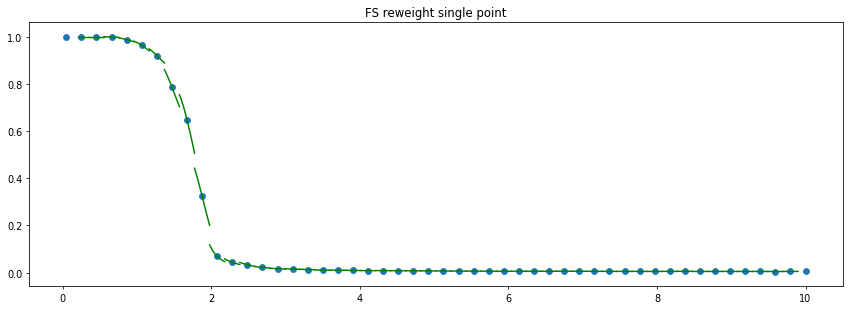

In [209]:
def FS_reweight(betas, beta, Fs, Os):
    exp_arg = -(betas[:, None] - beta) * Fs[None, :]
    #exp_arg -= np.max(exp_arg)
    
    boltz_factors = np.exp(exp_arg)
    return np.sum(boltz_factors * Os, axis = -1) / np.sum(boltz_factors, axis = -1)

def interp(Ts, Fs, Os, ax):
    for i in range(len(Ts))[1:-1]:
        new_Ts = np.linspace((Ts[i-1]+Ts[i])/2,(Ts[i+1]+Ts[i])/2, 20)

        reweighted_O = FS_reweight(betas = 1/new_Ts, beta = 1/Ts[i], Fs = Fs[i], Os = O[i])

        ax.plot(new_Ts, reweighted_O, color = 'g')

Fs = np.array([log.Ff + log.Fc for log in data])
O = np.array([log.Mf_moments[2] for log in data])

y = O.mean(axis = -1)
yerr = O.std(axis = -1)

Ts = parameters['Ts']

f, ax = plt.subplots(1, figsize = (15,5))
ax.scatter(Ts, y, marker = 'o')
ax.set(
    title = 'FS reweight single point',
    #xlim = (1,3),
    )
        
interp(Ts, Fs, Os, ax)

/home/tch14/conda-envs/intelpython3.5/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: underflow encountered in multiply
/home/tch14/conda-envs/intelpython3.5/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


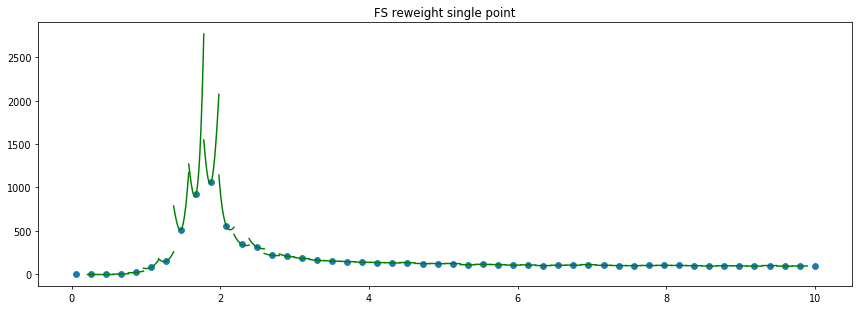

In [208]:
Fs = np.array([log.Ff + log.Fc for log in data])
O = (Fs - Fs.mean(axis=-1)[:, None])**2

y = O.mean(axis = -1)
yerr = O.std(axis = -1)

Ts = parameters['Ts']

f, ax = plt.subplots(1, figsize = (15,5))
ax.scatter(Ts, y, marker = 'o')
ax.set(
    title = 'FS reweight single point',
    #xlim = (1,3),
    )
        
interp(Ts, Fs, Os, ax)

/home/tch14/conda-envs/intelpython3.5/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/home/tch14/conda-envs/intelpython3.5/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


single point rewighting done


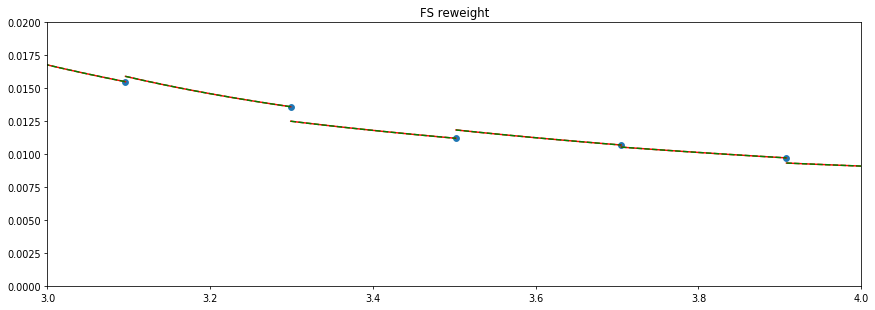

In [187]:
y = np.array([log.Mf_moments[2].mean() for log in data])
yerr = np.array([log.Mf_moments[2].std() for log in data]) 
x = Ts = parameters['Ts']

f, ax = plt.subplots(1, figsize = (15,5))
ax.scatter(x, y, marker = 'o')
ax.set(
    title = 'FS reweight',
    xlim = (3,4),
    ylim = (0,0.02)
    )

def FS_reweight_two_point(betas, beta, Fs, Os):
    beta, Fs, Os = np.broadcast_arrays(beta[:, None], Fs, Os)
    #beta = beta[:, None] * np.ones(Fs.shape)[None, :]
    beta, Fs, Os = np.array([beta, Fs, Os]).reshape(3,-1)
    
    exp_arg = -(betas[:, None] - beta[None, :]) * Fs[None, :]
    #exp_arg -= np.max(exp_arg)
    
    boltz_factors = np.exp(exp_arg)
    return np.sum(boltz_factors * Os, axis = -1) / np.sum(boltz_factors, axis = -1)

for i in range(len(data))[1:-1]:
    new_Ts = np.linspace(x[i-1],x[i], 20)
    #new_Ts = np.array([x[i],])

    betas = 1/new_Ts
    Fs = data[i].Ff + data[i].Fc
    Os = data[i].Mf_moments[2]

    reweighted_O = FS_reweight(betas, 1/x[i], Fs, Os)
    ax.plot(new_Ts, reweighted_O, color = 'r')
print('single point rewighting done')
    
for i in range(len(data))[1:-1]:
    new_Ts = np.linspace(x[i-1],x[i], 10)
    betas = 1/new_Ts
    
    beta = np.array([1/Ts[i-1], 1/Ts[i]])
    Fs = np.array([data[i-1].Ff + data[i-1].Fc, data[i].Ff + data[i].Fc])
    Os = np.array([data[i-1].Mf_moments[2], data[i].Mf_moments[2]])

    reweighted_O = FS_reweight_two_point(betas, beta, Fs, Os)
    ax.plot(new_Ts, reweighted_O, '--g')

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


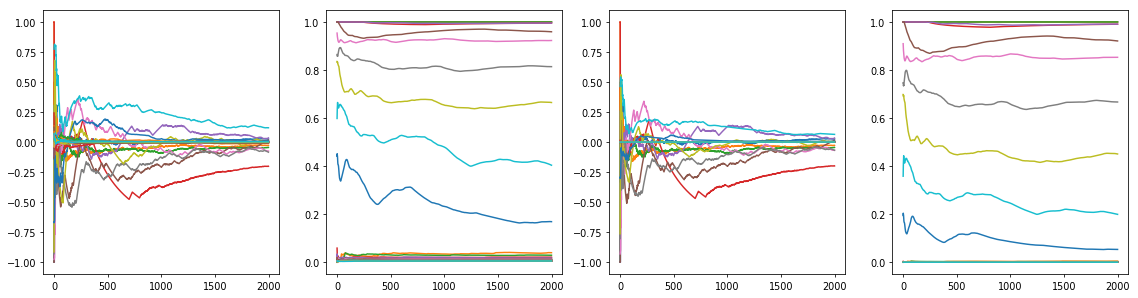

In [122]:
from FKMC.general import running_mean
f, axes = plt.subplots(1,4, figsize = (20,5))
for j in range(4):
    for i in range(len(Ts)):
        T = Ts[i]
        log = data[i]
        y = running_mean(log.Mf_moments[j+1])
        axes[j].plot(y)
ax.legend()

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


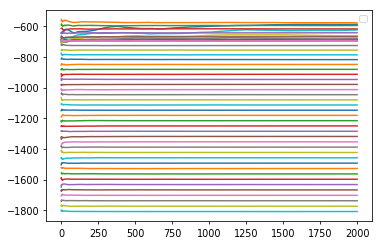

In [91]:
from FKMC.general import running_mean
f, ax = plt.subplots(1)
for i in range(len(Ts)):
    T = Ts[i]
    log = data[i]
    y = running_mean(log.Ff + log.Fc)
    x = np.arange(len(y))
    ax.errorbar(x, y)
ax.legend()

T = 1.4714285714285713


DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


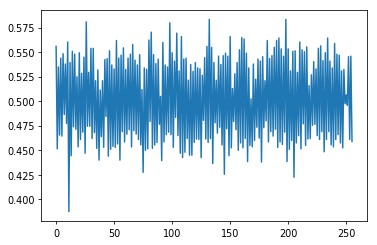

In [127]:
i = 7
f, ax = plt.subplots(1)
T = Ts[i]
print(f'T = {T}')
log = data[i]

#average site occupations
A = 2*(np.arange(log.N_sites) % 2) - 1
plt.plot(log.state.mean(axis = 0))

In [21]:
n_by_ns = np.zeros((50,256,256))
corrs = np.zeros((50,256,256))
cs = np.zeros((50,256))

A = 2*(np.arange(log.N_sites) % 2) - 1
for i in range(50):
    log = data[i]
    t = A * (2*log.state - 1)
    n_by_ns[i] = np.mean(t[:, :, None] * t[:, None, :], axis = 0)

    for j in range(log.N_sites):
        corrs[i,j] = np.roll(n_by_ns[i,j], shift = -j, axis = 0)

    cs[i] = corrs[i].mean(axis = 0)

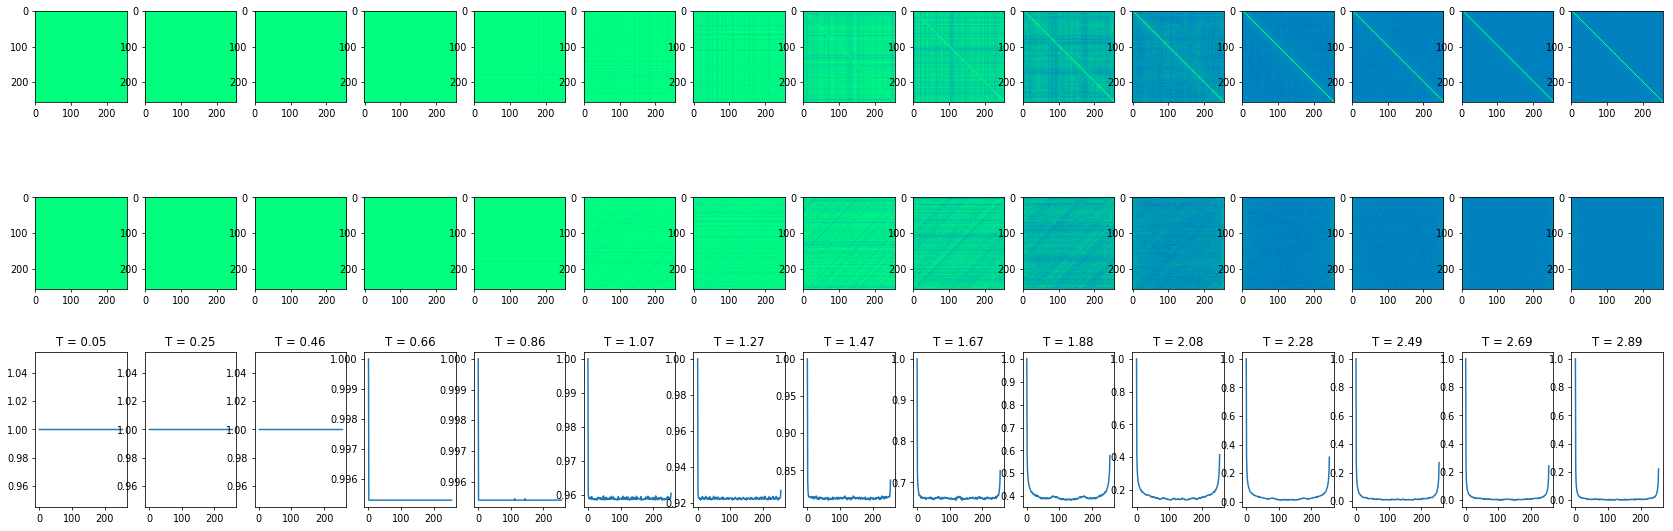

In [23]:
Is = np.arange(15)
f, axes = plt.subplots(3,len(Is), figsize = (,10))
norm = mpl.colors.Normalize(vmin=-1, vmax=1, clip=False)
cmap = plt.cm.get_cmap("winter")
for ax, i in zip(axes.T, Is):
    T = Ts[i]
    log = data[i]

    ax[2].set(title = f'T = {T:.2f}')
    ax[0].imshow(n_by_ns[i], cmap = cmap, norm = norm)
    ax[1].imshow(corrs[i], cmap = cmap, norm = norm)
    ax[2].plot(cs[i])